# Plot permutation results

Testing calibration of interaction model

In [1]:
suppressPackageStartupMessages({
    library(tidyr)
    library(dplyr)
    library(plyr)
    library(Matrix)
    library(lme4)
    library(Matrix.utils)
    library(singlecellmethods)
    library(MASS)
    library(glmnet)
    library(stringr)
    library(lmtest)
    library(lme4)
    library(ggplot2)
    library(ggrastr)
    library(RColorBrewer)
    library(forcats)
    library(ggrepel)
    library(symphony)
    library(irlba)
    library(patchwork)
    library(viridis)
})

source('../scripts/utils.R')

# Plot NBME permutation results

## Permuting 10 hPCs **across donors**

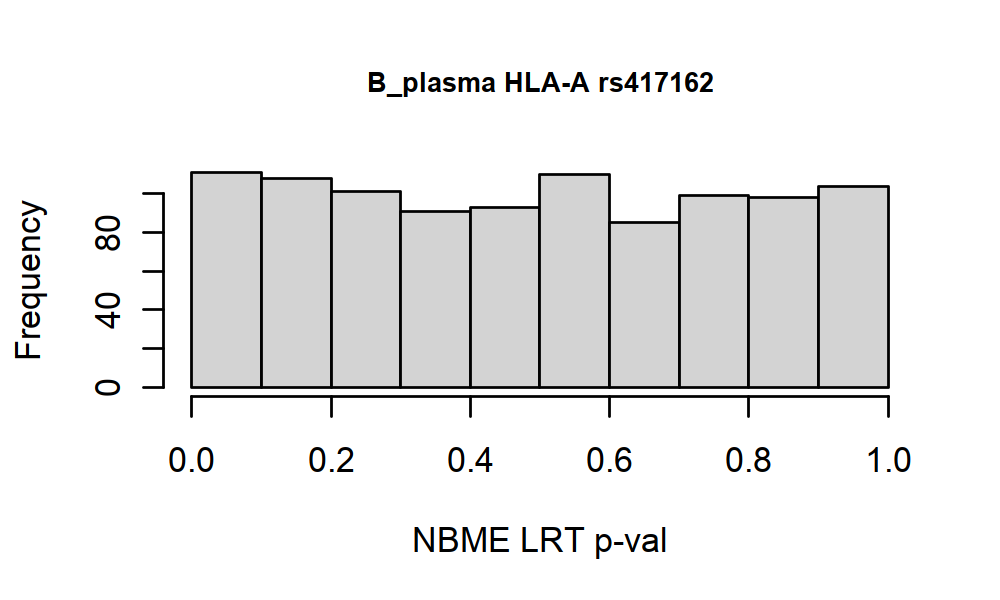

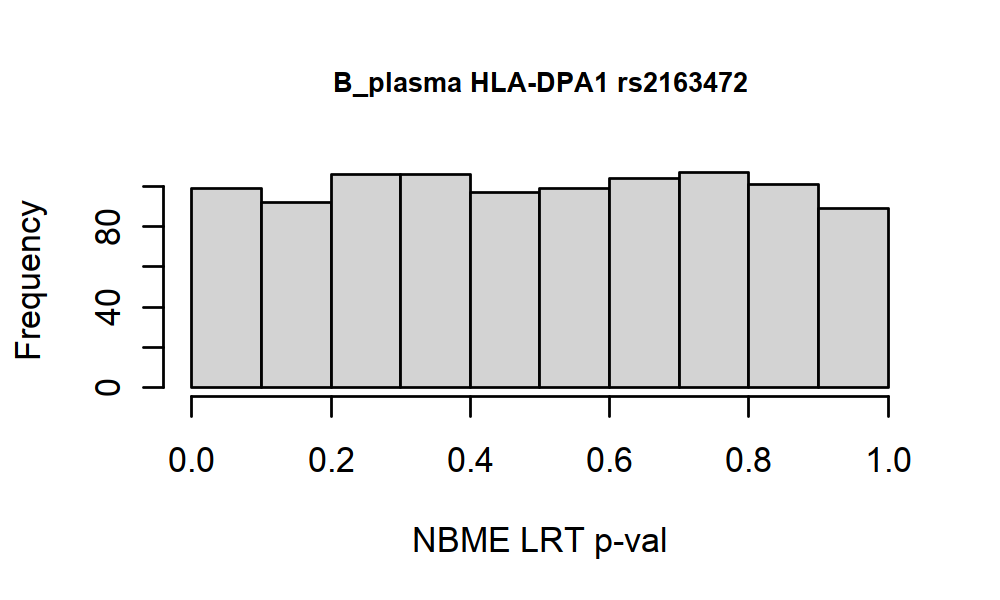

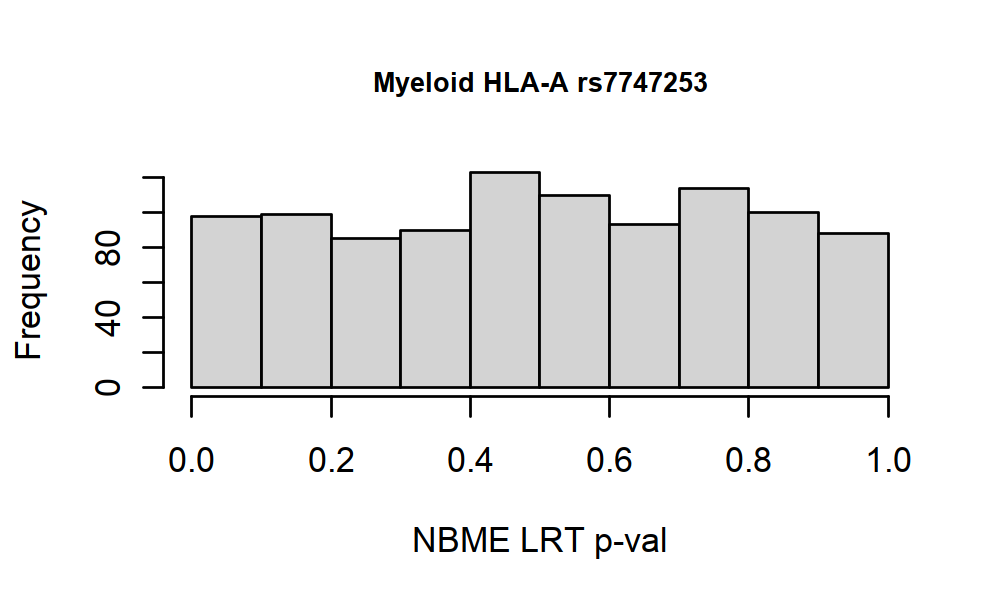

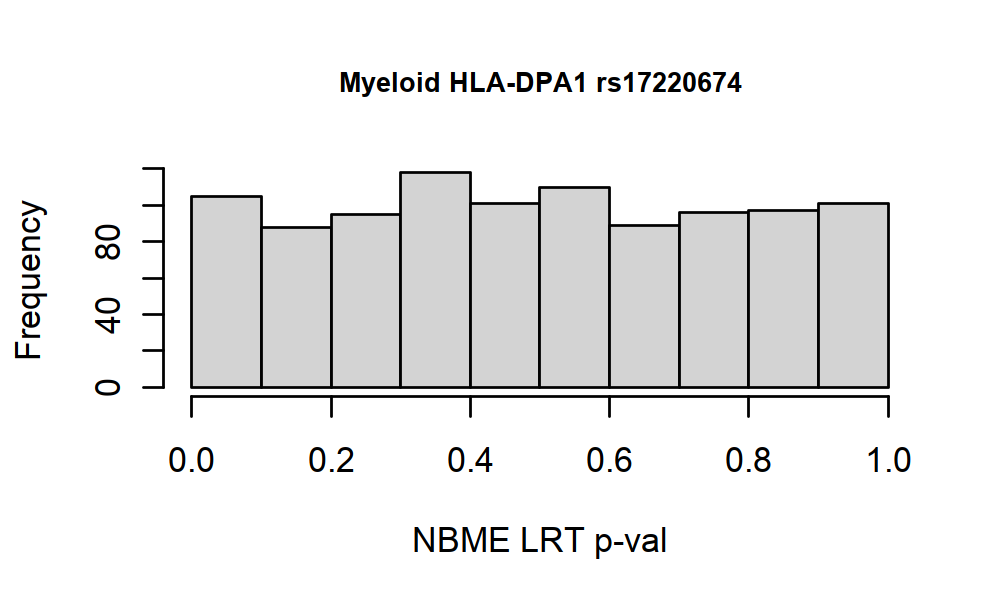

In [2]:
for (c in c('B_plasma', 'Myeloid')) {
    lead_variants = read.csv(paste0('../eqtl_pseudobulk/4_multidataset_eQTLs/', c, '_lead_variants.csv')) %>%
        filter(gene %in% c('HLA-A', 'HLA-DPA1'))
    
    for (i in 1:nrow(lead_variants)) {
        variant = lead_variants[i, 'variant']
        gene = lead_variants[i, 'gene']
        gene = str_replace(gene, '\\.', '-')
        
        fig.size(3, 5)
        res_NBME = readRDS(paste0('./4_sceQTL_permutation_OneK1K/NBME_OneK1K_hPCS__', 
                      c,'_', gene, '_', variant,'_1000_perms_acrossDonors.rds'))
        hist(res_NBME$lrt_pval, main = paste(c, gene, variant), breaks = 10, 
             cex.main = 0.8, xlab = 'NBME LRT p-val')
    }
}

# Plot figure - NBME

Representative class I eQTL

png 
  2

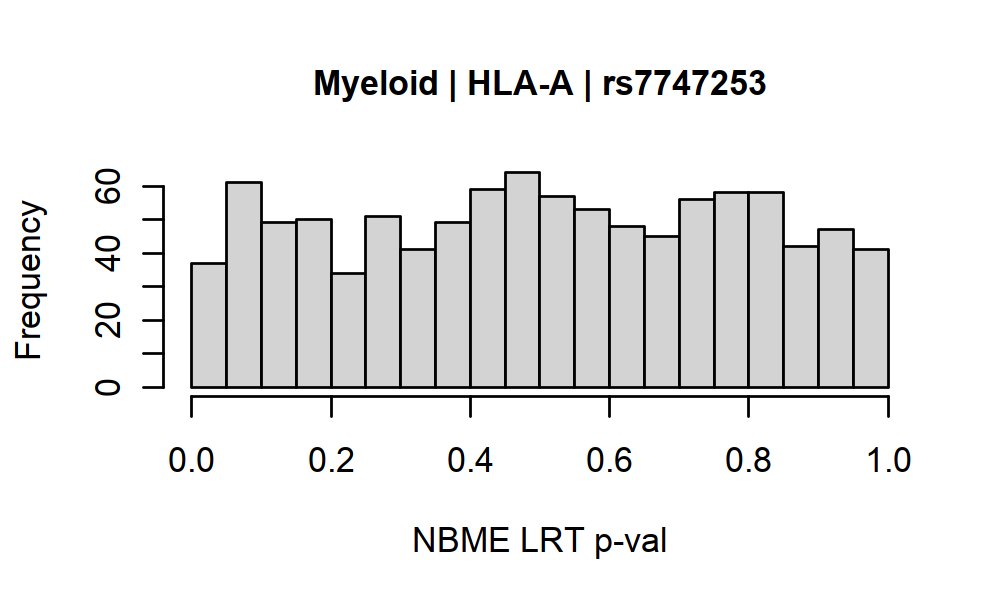

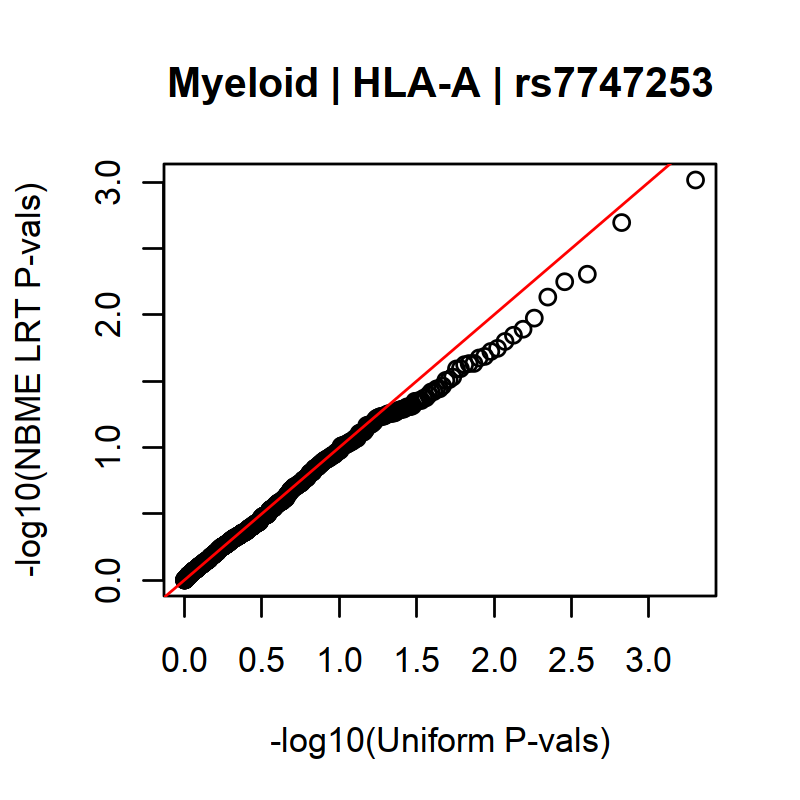

In [3]:
fig.size(3, 5)
res_NBME = readRDS(paste0('4_sceQTL_permutation_OneK1K/NBME_OneK1K_hPCS__', 
                      'Myeloid_', 'HLA-A', '_', 'rs7747253','_1000_perms_acrossDonors.rds'))
hist(res_NBME$lrt_pval, main = paste('Myeloid | HLA-A | rs7747253'),  breaks = 20, 
             cex.main = 1, xlab = 'NBME LRT p-val')

# Make Q-Q plot
fig.size(4, 4)
pdf(file = "../SuppFigs/fig_perms_QQ_Myeloid_HLA-A.pdf", width = 4, height = 4)
y <- qunif(ppoints(length(res_NBME$lrt_pval)))
qqplot(-log10(y), -log10(res_NBME$lrt_pval), 
       ylab = '-log10(NBME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)', 
       main = 'Myeloid | HLA-A | rs7747253')
abline(0, 1, col = 'red')
dev.off()

qqplot(-log10(y), -log10(res_NBME$lrt_pval), 
       ylab = '-log10(NBME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)', 
       main = 'Myeloid | HLA-A | rs7747253')
abline(0, 1, col = 'red')

Representative class II eQTL

png 
  2

png 
  2

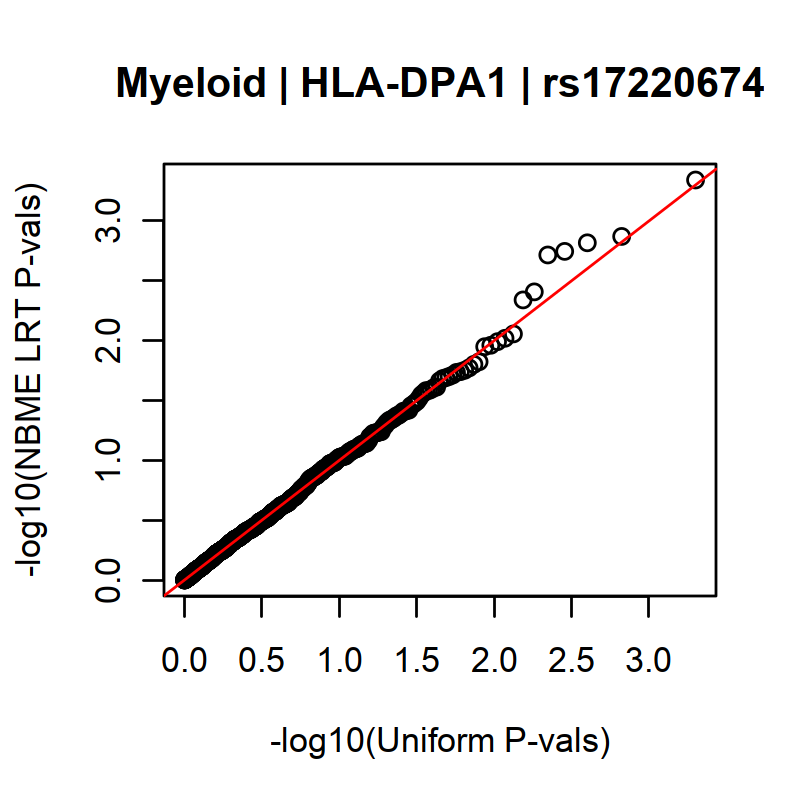

In [4]:
fig.size(3, 5)
pdf(file = "../SuppFigs/fig_hist_Myeloid_HLA-DPA1.pdf", width = 5, height = 3)
res_NBME = readRDS(paste0('./4_sceQTL_permutation_OneK1K/NBME_OneK1K_hPCS__', 
                      'Myeloid_', 'HLA-DPA1', '_', 'rs17220674','_1000_perms_acrossDonors.rds'))
hist(res_NBME$lrt_pval, main = paste('Myeloid | HLA-DPA1 | rs17220674'),  breaks = 20, 
             cex.main = 1, xlab = 'NBME LRT P-vals')
dev.off()

# Make Q-Q plot
fig.size(4, 4)
pdf(file = "../SuppFigs/fig_perms_QQ_Myeloid_HLA-DPA1.pdf", width = 4, height = 4)
y <- qunif(ppoints(length(res_NBME$lrt_pval)))
qqplot(-log10(y), -log10(res_NBME$lrt_pval), 
       ylab = '-log10(NBME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)',
       main = 'Myeloid | HLA-DPA1 | rs17220674')
abline(0, 1, col = 'red')
dev.off()

y <- qunif(ppoints(length(res_NBME$lrt_pval)))
qqplot(-log10(y), -log10(res_NBME$lrt_pval), 
       ylab = '-log10(NBME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)',
       main = 'Myeloid | HLA-DPA1 | rs17220674')
abline(0, 1, col = 'red')

## Compare to PME

Representative class I eQTL

png 
  2

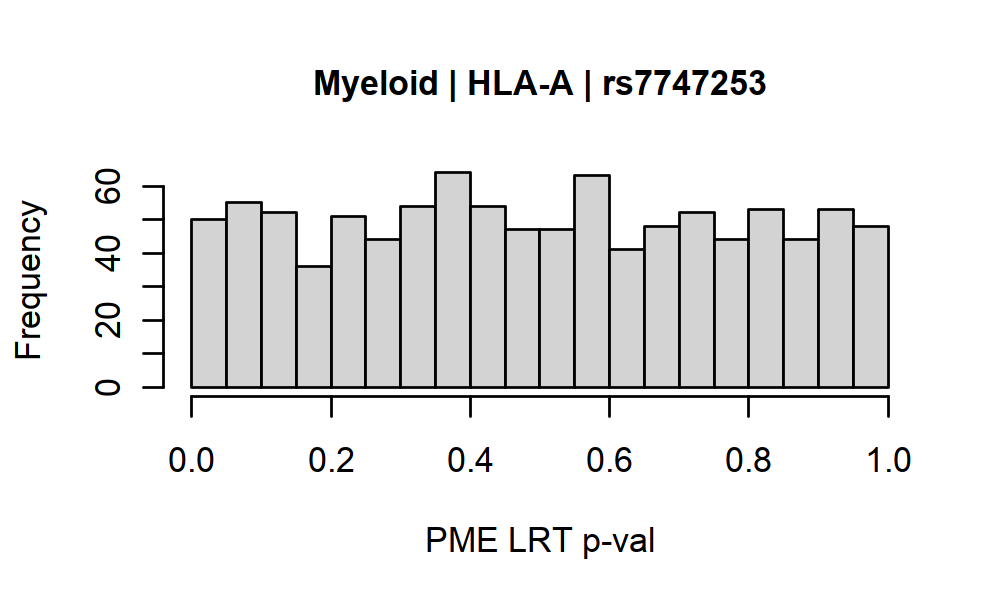

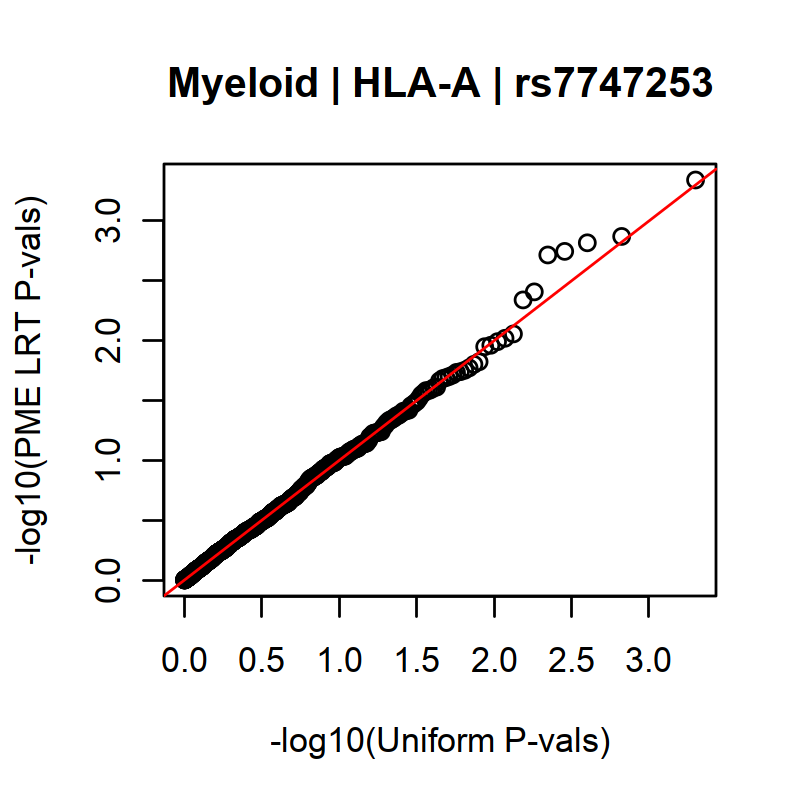

In [5]:
fig.size(3, 5)
res_PME = readRDS(paste0('./4_sceQTL_permutation_OneK1K/PME_OneK1K_hPCS__', 
                      'Myeloid_', 'HLA-A', '_', 'rs7747253','_1000_perms_acrossDonors.rds'))
hist(res_NBME$lrt_pval, main = paste('Myeloid | HLA-A | rs7747253'),  breaks = 20, 
             cex.main = 1, xlab = 'PME LRT p-val')

# Make Q-Q plot
fig.size(4, 4)
pdf(file = "../SuppFigs/fig_perms_PME_QQ_Myeloid_HLA-A.pdf", width = 4, height = 4)
y <- qunif(ppoints(length(res_NBME$lrt_pval)))
qqplot(-log10(y), -log10(res_NBME$lrt_pval), 
       ylab = '-log10(PME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)', 
       main = 'Myeloid | HLA-A | rs7747253')
abline(0, 1, col = 'red')
dev.off()

y <- qunif(ppoints(length(res_NBME$lrt_pval)))
qqplot(-log10(y), -log10(res_NBME$lrt_pval), 
       ylab = '-log10(PME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)', 
       main = 'Myeloid | HLA-A | rs7747253')
abline(0, 1, col = 'red')

Representative class II eQTL

png 
  2

png 
  2

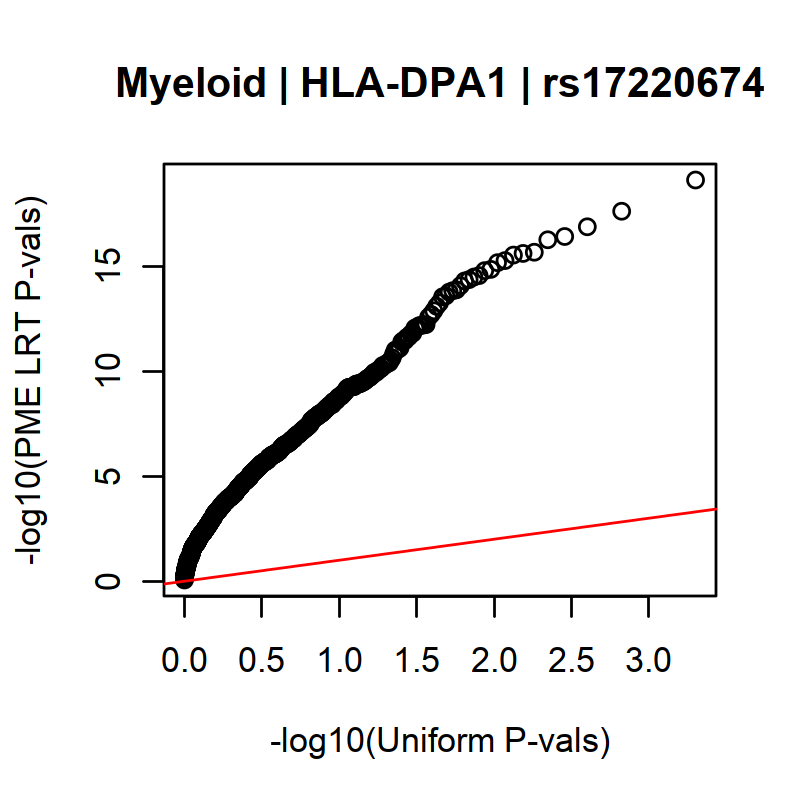

In [6]:
fig.size(3, 5)
pdf(file = "../SuppFigs/fig_hist_PME_Myeloid_HLA-DPA1.pdf", width = 5, height = 3)
res_PME = readRDS(paste0('./4_sceQTL_permutation_OneK1K/PME_OneK1K_hPCS__', 
                      'Myeloid_', 'HLA-DPA1', '_', 'rs17220674','_1000_perms_acrossDonors.rds'))
hist(res_PME$lrt_pval, main = paste('Myeloid | HLA-DPA1 | rs17220674'),  breaks = 20, 
             cex.main = 1, xlab = 'PME LRT P-vals')
dev.off()

# Make Q-Q plot
fig.size(4, 4)
pdf(file = "../SuppFigs/fig_perms_PME_QQ_Myeloid_HLA-DPA1.pdf", width = 4, height = 4)
y <- qunif(ppoints(length(res_PME$lrt_pval)))
qqplot(-log10(y), -log10(res_PME$lrt_pval),
       ylab = '-log10(PME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)',
       main = 'Myeloid | HLA-DPA1 | rs17220674')
abline(0, 1, col = 'red')
dev.off()

y <- qunif(ppoints(length(res_PME$lrt_pval)))
qqplot(-log10(y), -log10(res_PME$lrt_pval), 
       ylab = '-log10(PME LRT P-vals)',
       xlab = '-log10(Uniform P-vals)', 
       main = 'Myeloid | HLA-DPA1 | rs17220674')
abline(0, 1, col = 'red')

In [7]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/jbk37/anaconda3/envs/hla_new/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] viridis_0.6.2           viridisLite_0.4.1       patchwork_1.1.1        
 [4] irlba_2.3.5             symphony_0.1.0          ggrepel_0.9.1          
 [7] forcats_0.5.1           RColorBrewer_1.1-3      ggrastr_1.0.1          
[10] ggplot2_3.3.5           lmtest